In [2]:
import numpy as np
import pandas as pd

## INPUT FUNCTION

In [3]:
def getInput():
    graph={}
    vertices,edges=0,0
    print("""Enter vertices, Edges and egde weight in the folloing format:
    Example Input Format:
    8     -> Number of lines to follow (edges + 1)
    5 7   -> Number of vertices and edges
    1 2 2 -> Edge from vertex 1 to vertex 2 with weight 2
    1 3 4
    2 3 1
    2 4 7
    3 5 3
    4 5 1
    5 4 2

    You are supposed to enter edges one by one in the same format as above.
    """)


    lines = iter(input().strip() for _ in range(int(input("Enter number of lines to follow (edges + 1): ")) ))

    first_line = next(lines)

    vertices, edges = map(int, first_line.split())

    for _ in range(edges):
        u, v, w = map(int, next(lines).split())
        if u not in graph:
            graph[u] = []
        graph[u].append((v, w))

    print("no of vertices:", vertices)
    print("no of edges:", edges)
    print("Graph representation (Adjacency List):")

    for vertex in graph:
        print("vertex", vertex, "->", graph[vertex])
    
    return graph, vertices, edges

In [4]:
graph={}
vertices,edges=0,0
graph, vertices, edges = getInput()

Enter vertices, Edges and egde weight in the folloing format:
    Example Input Format:
    8     -> Number of lines to follow (edges + 1)
    5 7   -> Number of vertices and edges
    1 2 2 -> Edge from vertex 1 to vertex 2 with weight 2
    1 3 4
    2 3 1
    2 4 7
    3 5 3
    4 5 1
    5 4 2

    You are supposed to enter edges one by one in the same format as above.
    
no of vertices: 5
no of edges: 7
Graph representation (Adjacency List):
vertex 1 -> [(2, 2), (3, 4)]
vertex 2 -> [(3, 1), (4, 7)]
vertex 3 -> [(5, 3)]
vertex 4 -> [(5, 1)]
vertex 5 -> [(4, 2)]


## DIJKSTRA ALGO

In [5]:

def dijkstra(graph, start):
    heap =[] 
    heap.append((0, start))  # (distance, vertex)
    distances = {}
    for vertex in range(1, vertices + 1):
        distances[vertex] = float('infinity')
    distances[start] = 0

    while heap:
        current_distance, current_vertex = heap.pop(0)

        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph.get(current_vertex, []):
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heap.append((distance, neighbor))
                heap.sort()  # Maintain the heap property (Min-Heap)
    return distances

print("\n RUNNING DIJKSTRA'S ALGORITHM ...")
start_vertex = 1
distances = dijkstra(graph, start_vertex)
print(f"Shortest distances from vertex {start_vertex}:")
for vertex in range(1, vertices + 1):
    print(f"Vertex {vertex}: {distances[vertex]}")



 RUNNING DIJKSTRA'S ALGORITHM ...
Shortest distances from vertex 1:
Vertex 1: 0
Vertex 2: 2
Vertex 3: 3
Vertex 4: 8
Vertex 5: 6


## BELLMAN FORD

In [29]:
def bellman_ford(graph, source):
    distances=[]
    for vertex in range(1, vertices + 1):
        distances.append(float('infinity'))
    distances[source] = 0  

    # Relax edges repeatedly
    for _ in range(vertices - 1):
        for u in graph:           # u=current vertex
            for v, w in graph[u]: # v=neighbor, w=weight

                # Relaxation step
                if distances[u - 1] + w < distances[v - 1]:
                    distances[v - 1] = distances[u - 1] + w


    # Check for negative-weight cycles
    for u in graph: 
        for v, w in graph[u]:
            if distances[u - 1] + w < distances[v - 1]:
                print("Graph contains negative weight cycle")
                return None

    return distances


print("\n RUNNING BELLMAN-FORD ALGORITHM ...")
start_vertex = 1
distances = bellman_ford(graph, start_vertex - 1)
if distances:
    print("Shortest distances from vertex", start_vertex, "using Bellman-Ford:")
    for vertex in range(1, vertices + 1):
        print("Vertex", vertex, ":", distances[vertex - 1])



 RUNNING BELLMAN-FORD ALGORITHM ...
Shortest distances from vertex 1 using Bellman-Ford:
Vertex 1 : 0
Vertex 2 : 2
Vertex 3 : 3
Vertex 4 : 8
Vertex 5 : 6


## FLOYD WARSHELL

In [7]:

def floydwarshell(graph):
    # step 1: Initialize distance matrix
    dist =[]
    for i in range(vertices):
        dist.append([])
        for j in range(vertices):
            if i == j:
                dist[i].append(0)
            else:
                dist[i].append(float('infinity'))

    #step 2: Initialize distances based on graph edges            
    for u in graph:
        for v, w in graph[u]:
            dist[u - 1][v - 1] = w

    # step 3: Update distance matrix
    for i in range(vertices):          # intermediate 
        for j in range(vertices):      # start       
            for k in range(vertices):  # end         

                # Relaxation step 
                if dist[j][i] + dist[i][k] < dist[j][k]:
                    dist[j][k] = dist[j][i] + dist[i][k]
    return dist

distances = floydwarshell(graph)

def print_matrix_pandas(dist):
    # Convert INF to a readable "INF"
    df = pd.DataFrame(dist)
    df.replace([float('inf'), np.inf], "INF", inplace=True)

    # Rename rows and columns (1-based)
    df.index = [f"{i}" for i in range(1, len(dist) + 1)]
    df.columns = [f"{j}" for j in range(1, len(dist) + 1)]

    print(df)

print("\n RUNNING FLOYD-WARSHALL ALGORITHM ...")
print_matrix_pandas(distances)


 RUNNING FLOYD-WARSHALL ALGORITHM ...
     1    2    3  4  5
1  0.0  2.0  3.0  8  6
2  INF  0.0  1.0  6  4
3  INF  INF  0.0  5  3
4  INF  INF  INF  0  1
5  INF  INF  INF  2  0


## HELPER FUNCTIONS FOR JOHNSON

In [ ]:
def bellman_fordH(graph, source, vertices):
    distances = {}
    # Initialize all vertices that appear in the graph
    for u in graph:
        distances[u] = float('infinity')
        for v, w in graph[u]:
            if v not in distances:
                distances[v] = float('infinity')
    
    distances[source] = 0  

    # Relax edges repeatedly
    for _ in range(vertices - 1):
        for u in graph:
            if distances[u] != float('infinity'):
                for v, w in graph[u]:
                    # Relaxation step
                    if distances[u] + w < distances[v]:
                        distances[v] = distances[u] + w

    # Check for negative-weight cycles
    for u in graph: 
        if distances[u] != float('infinity'):
            for v, w in graph[u]:
                if distances[u] + w < distances[v]:
                    print("Graph contains negative weight cycle")
                    return None

    return distances

def dijkstraH(graph, start,vertices):
    heap =[] 
    heap.append((0, start))  # (distance, vertex)
    distances = {}
    for vertex in range(1, vertices + 1):
        distances[vertex] = float('infinity')
    distances[start] = 0

    while heap:
        current_distance, current_vertex = heap.pop(0)

        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph.get(current_vertex, []):
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heap.append((distance, neighbor))
                heap.sort()  # Maintain the heap property (Min-Heap)
    return distances


In [11]:
def johnson(graph):
    #step 1: add new vertex '0' 
    newGraph={}
    newGraph[0] = []

    #step 2:  connected to all other vertices with edge weight 0
    for vertex in range(1, vertices + 1):
        newGraph[0].append((vertex, 0))
        newGraph[vertex] = graph.get(vertex, [])
    # step 3: run bellman ford from new vertex '0'
    bellmanDist= bellman_fordH(newGraph, 0,vertices)
    # bellmanDist= bellman_ford(newGraph, 0)
    if bellmanDist is None:
        print("Graph contains negative weight cycle. Johnson's algorithm cannot proceed.")
        return None
    # step 4: reweight edges
    reweightedGraph={}
    for u in graph:
        reweightedGraph[u] = []
        for v, w in graph[u]:
            newWeight = w + bellmanDist[u] - bellmanDist[v]
            reweightedGraph[u].append((v, newWeight))
    # step 5: remove the added vertex '0' (not needed anymore as we have reweighted the graph) 
    # step 6: run dijkstra for each vertex
    ActualDIst={}
    for v in range(1, vertices + 1):
        dijkstraDist = dijkstraH(reweightedGraph, v,vertices)
        # dijkstraDist=dijkstra(reweightedGraph, v)
        ActualDIst[v] = {}
        for u in dijkstraDist:
            ActualDIst[v][u] = dijkstraDist[u] - bellmanDist[v] + bellmanDist[u]
    return ActualDIst


def print_matrix_pandas(dist):
    # Convert INF to a readable "INF"
    df = pd.DataFrame(dist)
    df.replace([float('inf'), np.inf], "INF", inplace=True)

    # Rename rows and columns (1-based)
    df.index = [f"{i}" for i in range(1, len(dist) + 1)]
    df.columns = [f"{j}" for j in range(1, len(dist) + 1)]
    print("\nDistance Matrix:")
    print(df)


all_pairs_distances = johnson(graph)
if all_pairs_distances:
    print("\n RUNNING JOHNSON'S ALGORITHM ...")
    for u in all_pairs_distances:
        for v in all_pairs_distances[u]:
            print(f"Distance from vertex {u} to vertex {v}: {all_pairs_distances[u][v]}")

    # Convert to matrix form for better visualization
    distance_matrix = []
    for i in range(1, vertices + 1):
        row = []
        for j in range(1, vertices + 1):
            row.append(all_pairs_distances[i][j])
        distance_matrix.append(row)
    print_matrix_pandas(distance_matrix)
    


 RUNNING JOHNSON'S ALGORITHM ...
Distance from vertex 1 to vertex 1: 0
Distance from vertex 1 to vertex 2: 2
Distance from vertex 1 to vertex 3: 3
Distance from vertex 1 to vertex 4: 8
Distance from vertex 1 to vertex 5: 6
Distance from vertex 2 to vertex 1: inf
Distance from vertex 2 to vertex 2: 0
Distance from vertex 2 to vertex 3: 1
Distance from vertex 2 to vertex 4: 6
Distance from vertex 2 to vertex 5: 4
Distance from vertex 3 to vertex 1: inf
Distance from vertex 3 to vertex 2: inf
Distance from vertex 3 to vertex 3: 0
Distance from vertex 3 to vertex 4: 5
Distance from vertex 3 to vertex 5: 3
Distance from vertex 4 to vertex 1: inf
Distance from vertex 4 to vertex 2: inf
Distance from vertex 4 to vertex 3: inf
Distance from vertex 4 to vertex 4: 0
Distance from vertex 4 to vertex 5: 1
Distance from vertex 5 to vertex 1: inf
Distance from vertex 5 to vertex 2: inf
Distance from vertex 5 to vertex 3: inf
Distance from vertex 5 to vertex 4: 2
Distance from vertex 5 to vertex 5: 

## <<------- EXPERIMENTS AND RESULTS -------->> 

In [12]:
import random

def generate_sparse_graph(n_vertices, weight_range=(1, 10)):
    """Generate sparse graph where E ≈ V"""
    graph = {}
    edges = 0
    
    # Initialize all vertices
    for i in range(1, n_vertices + 1):
        graph[i] = []
    
    # Add approximately V edges (each vertex connects to 1-2 others)
    for u in range(1, n_vertices + 1):
        # Each vertex connects to 1-2 random vertices
        num_connections = random.randint(1, 2)
        possible_targets = [v for v in range(1, n_vertices + 1) if v != u]
        
        for _ in range(min(num_connections, len(possible_targets))):
            if possible_targets:
                v = random.choice(possible_targets)
                possible_targets.remove(v)
                weight = random.randint(weight_range[0], weight_range[1])
                graph[u].append((v, weight))
                edges += 1
    
    return graph, n_vertices, edges


def generate_dense_graph(n_vertices, weight_range=(1, 10)):
    """Generate dense graph where E ≈ V²"""
    graph = {}
    edges = 0
    
    # Initialize all vertices
    for i in range(1, n_vertices + 1):
        graph[i] = []
    
    # Connect most vertices to most other vertices (80-90% connectivity)
    connection_probability = 0.85
    
    for u in range(1, n_vertices + 1):
        for v in range(1, n_vertices + 1):
            if u != v and random.random() < connection_probability:
                weight = random.randint(weight_range[0], weight_range[1])
                graph[u].append((v, weight))
                edges += 1
    
    return graph, n_vertices, edges


def generate_mixed_graph(n_vertices, edge_density=0.3, negative_weight_prob=0.3, weight_range=(-5, 10)):
    """Generate graph with mixed positive and negative weights (no negative cycles)"""
    graph = {}
    edges = 0
    
    # Initialize all vertices
    for i in range(1, n_vertices + 1):
        graph[i] = []
    
    # Add edges based on density
    for u in range(1, n_vertices + 1):
        for v in range(1, n_vertices + 1):
            if u != v and random.random() < edge_density:
                # Decide if weight should be negative
                if random.random() < negative_weight_prob:
                    weight = random.randint(weight_range[0], -1)
                else:
                    weight = random.randint(1, weight_range[1])
                
                graph[u].append((v, weight))
                edges += 1
    
    # Ensure no negative cycles by making it a DAG-like structure for negative edges
    # (This is a simple heuristic - not perfect but works for testing)
    
    return graph, n_vertices, edges

In [21]:
def dijkstra_with_metrics(graph, start, vertices):
    """Dijkstra with relaxation counting"""
    heap = [] 
    heap.append((0, start))
    distances = {}
    for vertex in range(1, vertices + 1):
        distances[vertex] = float('infinity')
    distances[start] = 0
    
    relaxations = 0
    
    while heap:
        current_distance, current_vertex = heap.pop(0)
        
        if current_distance > distances[current_vertex]:
            continue
        
        for neighbor, weight in graph.get(current_vertex, []):
            distance = current_distance + weight
            
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heap.append((distance, neighbor))
                heap.sort()
                relaxations += 1
    
    return distances, relaxations


def bellman_ford_with_metrics(graph, source, vertices):
    """Bellman-Ford with relaxation counting"""
    distances = []
    for vertex in range(1, vertices + 1):
        distances.append(float('infinity'))
    distances[source - 1] = 0  
    
    relaxations = 0
    
    # Relax edges repeatedly
    for _ in range(vertices - 1):
        for u in graph:
            for v, w in graph[u]:
                if distances[u - 1] + w < distances[v - 1]:
                    distances[v - 1] = distances[u - 1] + w
                    relaxations += 1
    
    # Check for negative-weight cycles
    for u in graph:
        for v, w in graph[u]:
            if distances[u - 1] + w < distances[v - 1]:
                return None, relaxations
    
    return distances, relaxations


def floydwarshall_with_metrics(graph, vertices):
    """Floyd-Warshall with relaxation counting"""
    # Initialize distance matrix
    dist = []
    for i in range(vertices):
        dist.append([])
        for j in range(vertices):
            if i == j:
                dist[i].append(0)
            else:
                dist[i].append(float('infinity'))
    
    # Initialize distances based on graph edges
    for u in graph:
        for v, w in graph[u]:
            dist[u - 1][v - 1] = w
    
    relaxations = 0
    
    # Update distance matrix
    for i in range(vertices):
        for j in range(vertices):
            for k in range(vertices):
                if dist[j][i] + dist[i][k] < dist[j][k]:
                    dist[j][k] = dist[j][i] + dist[i][k]
                    relaxations += 1
    
    return dist, relaxations


def johnson_with_metrics(graph, vertices):
    """Johnson's algorithm with relaxation counting"""
    # Step 1 & 2: Add new vertex '0'
    newGraph = {}
    newGraph[0] = []
    
    for vertex in range(1, vertices + 1):
        newGraph[0].append((vertex, 0))
        newGraph[vertex] = graph.get(vertex, [])
    
    # Step 3: Run Bellman-Ford
    bellmanDist = {}
    for u in newGraph:
        bellmanDist[u] = float('infinity')
        for v, w in newGraph[u]:
            if v not in bellmanDist:
                bellmanDist[v] = float('infinity')
    
    bellmanDist[0] = 0
    bellman_relaxations = 0
    
    for _ in range(vertices):
        for u in newGraph:
            if bellmanDist[u] != float('infinity'):
                for v, w in newGraph[u]:
                    if bellmanDist[u] + w < bellmanDist[v]:
                        bellmanDist[v] = bellmanDist[u] + w
                        bellman_relaxations += 1
    
    # Check for negative cycles
    for u in newGraph:
        if bellmanDist[u] != float('infinity'):
            for v, w in newGraph[u]:
                if bellmanDist[u] + w < bellmanDist[v]:
                    return None, bellman_relaxations
    
    # Step 4: Reweight edges
    reweightedGraph = {}
    for u in graph:
        reweightedGraph[u] = []
        for v, w in graph[u]:
            newWeight = w + bellmanDist[u] - bellmanDist[v]
            reweightedGraph[u].append((v, newWeight))
    
    # Step 5 & 6: Run Dijkstra for each vertex
    ActualDist = {}
    dijkstra_relaxations = 0
    
    for v in range(1, vertices + 1):
        distances = {}
        for vertex in range(1, vertices + 1):
            distances[vertex] = float('infinity')
        distances[v] = 0
        
        heap = [(0, v)]
        
        while heap:
            current_distance, current_vertex = heap.pop(0)
            
            if current_distance > distances[current_vertex]:
                continue
            
            for neighbor, weight in reweightedGraph.get(current_vertex, []):
                distance = current_distance + weight
                
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heap.append((distance, neighbor))
                    heap.sort()
                    dijkstra_relaxations += 1
        
        ActualDist[v] = {}
        for u in distances:
            ActualDist[v][u] = distances[u] - bellmanDist[v] + bellmanDist[u]
    
    total_relaxations = bellman_relaxations + dijkstra_relaxations
    return ActualDist, total_relaxations

In [22]:
import time
import tracemalloc
import sys

def measure_algorithm_performance(algo_func, graph, vertices, algo_name, **kwargs):
    """Measure execution time, memory usage, and relaxations for an algorithm"""
    
    # Start memory tracking
    tracemalloc.start()
    
    # Measure execution time
    start_time = time.perf_counter()
    
    # Run algorithm
    if algo_name == "Dijkstra":
        result, relaxations = algo_func(graph, kwargs.get('start', 1), vertices)
    elif algo_name == "Bellman-Ford":
        result, relaxations = algo_func(graph, kwargs.get('source', 1), vertices)
    elif algo_name == "Floyd-Warshall":
        result, relaxations = algo_func(graph, vertices)
    elif algo_name == "Johnson":
        result, relaxations = algo_func(graph, vertices)
    else:
        result, relaxations = None, 0
    
    end_time = time.perf_counter()
    
    # Get memory usage
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    execution_time = end_time - start_time
    memory_usage = peak / 1024  # Convert to KB
    
    return {
        'algorithm': algo_name,
        'time': execution_time,
        'memory': memory_usage,
        'relaxations': relaxations,
        'result': result,
        'success': result is not None
    }


def run_experiment(graph_type, n_vertices, algo_name, trials=3):
    """Run single experiment with multiple trials"""
    results = []
    
    for trial in range(trials):
        # Generate appropriate graph
        if graph_type == "Sparse":
            graph, vertices, edges = generate_sparse_graph(n_vertices)
        elif graph_type == "Dense":
            graph, vertices, edges = generate_dense_graph(n_vertices)
        elif graph_type == "Mixed":
            graph, vertices, edges = generate_mixed_graph(n_vertices)
        else:
            continue
        
        # Select appropriate algorithm
        if algo_name == "Dijkstra":
            metrics = measure_algorithm_performance(
                dijkstra_with_metrics, graph, vertices, algo_name, start=1
            )
        elif algo_name == "Bellman-Ford":
            metrics = measure_algorithm_performance(
                bellman_ford_with_metrics, graph, vertices, algo_name, source=1
            )
        elif algo_name == "Floyd-Warshall":
            metrics = measure_algorithm_performance(
                floydwarshall_with_metrics, graph, vertices, algo_name
            )
        elif algo_name == "Johnson":
            metrics = measure_algorithm_performance(
                johnson_with_metrics, graph, vertices, algo_name
            )
        else:
            continue
        
        metrics['graph_type'] = graph_type
        metrics['vertices'] = vertices
        metrics['edges'] = edges
        metrics['trial'] = trial + 1
        
        results.append(metrics)
    
    # Calculate averages
    if results:
        avg_result = {
            'algorithm': algo_name,
            'graph_type': graph_type,
            'vertices': n_vertices,
            'edges': sum(r['edges'] for r in results) / len(results),
            'time': sum(r['time'] for r in results) / len(results),
            'memory': sum(r['memory'] for r in results) / len(results),
            'relaxations': sum(r['relaxations'] for r in results) / len(results),
            'success_rate': sum(1 for r in results if r['success']) / len(results)
        }
        return avg_result
    
    return None

In [23]:
def run_all_experiments():
    """Run comprehensive experiments on all graph types and algorithms"""
    results = []
    
    # Sparse graph experiments (10-50 vertices)
    print("Running experiments on SPARSE graphs...")
    sparse_sizes = [10, 20, 30, 40, 50]
    for size in sparse_sizes:
        print(f"  Testing with {size} vertices...")
        
        # Dijkstra (single-source, so faster)
        result = run_experiment("Sparse", size, "Dijkstra", trials=3)
        if result:
            results.append(result)
        
        # Bellman-Ford
        result = run_experiment("Sparse", size, "Bellman-Ford", trials=3)
        if result:
            results.append(result)
        
        # Floyd-Warshall (all-pairs)
        result = run_experiment("Sparse", size, "Floyd-Warshall", trials=3)
        if result:
            results.append(result)
        
        # Johnson (all-pairs)
        result = run_experiment("Sparse", size, "Johnson", trials=3)
        if result:
            results.append(result)
    
    # Dense graph experiments (100-200 vertices)
    print("\nRunning experiments on DENSE graphs...")
    dense_sizes = [100, 150, 200]
    for size in dense_sizes:
        print(f"  Testing with {size} vertices...")
        
        # Note: Only testing Floyd-Warshall and Johnson for dense graphs
        # (Dijkstra and Bellman-Ford are single-source)
        
        # Floyd-Warshall
        result = run_experiment("Dense", size, "Floyd-Warshall", trials=3)
        if result:
            results.append(result)
        
        # Johnson
        result = run_experiment("Dense", size, "Johnson", trials=3)
        if result:
            results.append(result)
    
    # Mixed graph experiments (with negative weights)
    print("\nRunning experiments on MIXED graphs (with negative weights)...")
    mixed_sizes = [10, 20, 30, 40, 50]
    for size in mixed_sizes:
        print(f"  Testing with {size} vertices...")
        
        # Bellman-Ford (handles negative weights)
        result = run_experiment("Mixed", size, "Bellman-Ford", trials=3)
        if result:
            results.append(result)
        
        # Floyd-Warshall (handles negative weights)
        result = run_experiment("Mixed", size, "Floyd-Warshall", trials=3)
        if result:
            results.append(result)
        
        # Johnson (handles negative weights)
        result = run_experiment("Mixed", size, "Johnson", trials=3)
        if result:
            results.append(result)
    
    # Convert to DataFrame
    df = pd.DataFrame(results)
    return df

In [24]:
import matplotlib.pyplot as plt

def plot_execution_time_comparison(results_df):
    """Plot execution time comparison across algorithms and graph types"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    graph_types = ['Sparse', 'Dense', 'Mixed']
    
    for idx, gtype in enumerate(graph_types):
        data = results_df[results_df['graph_type'] == gtype]
        
        if not data.empty:
            for algo in data['algorithm'].unique():
                algo_data = data[data['algorithm'] == algo]
                axes[idx].plot(algo_data['vertices'], algo_data['time'], 
                              marker='o', label=algo)
            
            axes[idx].set_xlabel('Number of Vertices')
            axes[idx].set_ylabel('Execution Time (seconds)')
            axes[idx].set_title(f'{gtype} Graphs')
            axes[idx].legend()
            axes[idx].grid(True)
    
    plt.tight_layout()
    plt.savefig('execution_time_comparison.png', dpi=300)
    plt.show()


def plot_relaxations_comparison(results_df):
    """Plot relaxation count comparison"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    graph_types = ['Sparse', 'Dense', 'Mixed']
    
    for idx, gtype in enumerate(graph_types):
        data = results_df[results_df['graph_type'] == gtype]
        
        if not data.empty:
            for algo in data['algorithm'].unique():
                algo_data = data[data['algorithm'] == algo]
                axes[idx].plot(algo_data['vertices'], algo_data['relaxations'], 
                              marker='s', label=algo)
            
            axes[idx].set_xlabel('Number of Vertices')
            axes[idx].set_ylabel('Number of Relaxations')
            axes[idx].set_title(f'{gtype} Graphs')
            axes[idx].legend()
            axes[idx].grid(True)
    
    plt.tight_layout()
    plt.savefig('relaxations_comparison.png', dpi=300)
    plt.show()


def plot_memory_usage(results_df):
    """Plot memory usage comparison"""
    plt.figure(figsize=(12, 6))
    
    for algo in results_df['algorithm'].unique():
        algo_data = results_df[results_df['algorithm'] == algo]
        plt.plot(algo_data['vertices'], algo_data['memory'], 
                marker='d', label=algo)
    
    plt.xlabel('Number of Vertices')
    plt.ylabel('Memory Usage (KB)')
    plt.title('Memory Usage Comparison')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('memory_usage.png', dpi=300)
    plt.show()


def plot_scalability(results_df):
    """Plot scalability - how algorithms scale with graph size"""
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    algorithms = results_df['algorithm'].unique()
    
    for idx, algo in enumerate(algorithms):
        if idx < 4:
            row = idx // 2
            col = idx % 2
            
            algo_data = results_df[results_df['algorithm'] == algo]
            
            for gtype in algo_data['graph_type'].unique():
                type_data = algo_data[algo_data['graph_type'] == gtype]
                axes[row, col].plot(type_data['vertices'], type_data['time'], 
                                   marker='o', label=gtype)
            
            axes[row, col].set_xlabel('Number of Vertices')
            axes[row, col].set_ylabel('Execution Time (seconds)')
            axes[row, col].set_title(f'{algo} Scalability')
            axes[row, col].legend()
            axes[row, col].grid(True)
    
    plt.tight_layout()
    plt.savefig('scalability_comparison.png', dpi=300)
    plt.show()


def create_comparison_table(results_df):
    """Create formatted comparison table"""
    # Group by algorithm and graph type
    summary = results_df.groupby(['algorithm', 'graph_type']).agg({
        'time': 'mean',
        'memory': 'mean',
        'relaxations': 'mean',
        'vertices': 'mean'
    }).reset_index()
    
    # Format numbers
    summary['time'] = summary['time'].apply(lambda x: f"{x:.6f}")
    summary['memory'] = summary['memory'].apply(lambda x: f"{x:.2f}")
    summary['relaxations'] = summary['relaxations'].apply(lambda x: f"{int(x)}")
    summary['vertices'] = summary['vertices'].apply(lambda x: f"{int(x)}")
    
    # Rename columns
    summary.columns = ['Algorithm', 'Graph Type', 'Avg Time (s)', 'Avg Memory (KB)', 'Avg Relaxations', 'Avg Vertices']
    
    print("\n" + "="*100)
    print("PERFORMANCE COMPARISON TABLE")
    print("="*100)
    print(summary.to_string(index=False))
    print("="*100)
    
    return summary

In [25]:
def verify_correctness(test_graph, test_vertices):
    """Verify that all algorithms produce consistent results"""
    print("\n" + "="*80)
    print("CORRECTNESS VERIFICATION")
    print("="*80)
    
    # Run Dijkstra (single source from vertex 1)
    print("\n1. Running Dijkstra from vertex 1...")
    dijkstra_dist, _ = dijkstra_with_metrics(test_graph, 1, test_vertices)
    print(f"   Distances: {dijkstra_dist}")
    
    # Run Bellman-Ford (single source from vertex 1)
    print("\n2. Running Bellman-Ford from vertex 1...")
    bf_dist, _ = bellman_ford_with_metrics(test_graph, 1, test_vertices)
    print(f"   Distances: {bf_dist}")
    
    # Run Floyd-Warshall (all pairs)
    print("\n3. Running Floyd-Warshall...")
    fw_dist, _ = floydwarshall_with_metrics(test_graph, test_vertices)
    fw_from_1 = fw_dist[0]  # Distances from vertex 1
    print(f"   Distances from vertex 1: {fw_from_1}")
    
    # Run Johnson (all pairs)
    print("\n4. Running Johnson's...")
    johnson_dist, _ = johnson_with_metrics(test_graph, test_vertices)
    if johnson_dist:
        johnson_from_1 = johnson_dist[1]
        print(f"   Distances from vertex 1: {johnson_from_1}")
    
    # Compare results
    print("\n" + "-"*80)
    print("COMPARISON:")
    print("-"*80)
    
    all_match = True
    for v in range(1, test_vertices + 1):
        dij_val = dijkstra_dist.get(v, float('inf'))
        bf_val = bf_dist[v-1] if bf_dist else float('inf')
        fw_val = fw_from_1[v-1]
        john_val = johnson_dist[1][v] if johnson_dist else float('inf')
        
        match = (abs(dij_val - bf_val) < 0.001 and 
                abs(bf_val - fw_val) < 0.001 and 
                abs(fw_val - john_val) < 0.001)
        
        status = "✓ MATCH" if match else "✗ MISMATCH"
        print(f"Vertex {v}: Dijkstra={dij_val:.2f}, Bellman-Ford={bf_val:.2f}, "
              f"Floyd-Warshall={fw_val:.2f}, Johnson={john_val:.2f} [{status}]")
        
        if not match:
            all_match = False
    
    print("-"*80)
    if all_match:
        print("✓ ALL ALGORITHMS PRODUCE CONSISTENT RESULTS")
    else:
        print("✗ INCONSISTENCIES DETECTED")
    print("="*80)
    
    return all_match


def test_negative_weights():
    """Test algorithms with negative weights"""
    print("\n" + "="*80)
    print("NEGATIVE WEIGHT TESTING")
    print("="*80)
    
    # Create a graph with negative weights (but no negative cycle)
    test_graph = {
        1: [(2, 4), (3, 2)],
        2: [(3, -5), (4, 1)],
        3: [(4, 3)],
        4: []
    }
    test_vertices = 4
    
    print("\nTest Graph with Negative Weights:")
    for u in test_graph:
        print(f"  Vertex {u} -> {test_graph[u]}")
    
    # Test Dijkstra (should not work correctly with negative weights)
    print("\n1. Dijkstra (NOT designed for negative weights):")
    dij_dist, _ = dijkstra_with_metrics(test_graph, 1, test_vertices)
    print(f"   Result: {dij_dist}")
    print("   ⚠ May produce incorrect results with negative weights")
    
    # Test Bellman-Ford
    print("\n2. Bellman-Ford (handles negative weights):")
    bf_dist, _ = bellman_ford_with_metrics(test_graph, 1, test_vertices)
    if bf_dist:
        print(f"   Result: {bf_dist}")
        print("   ✓ Successfully handled negative weights")
    
    # Test Floyd-Warshall
    print("\n3. Floyd-Warshall (handles negative weights):")
    fw_dist, _ = floydwarshall_with_metrics(test_graph, test_vertices)
    print(f"   Result from vertex 1: {fw_dist[0]}")
    print("   ✓ Successfully handled negative weights")
    
    # Test Johnson
    print("\n4. Johnson (handles negative weights):")
    johnson_dist, _ = johnson_with_metrics(test_graph, test_vertices)
    if johnson_dist:
        print(f"   Result from vertex 1: {johnson_dist[1]}")
        print("   ✓ Successfully handled negative weights")
    
    print("="*80)


def test_negative_cycle_detection():
    """Test negative cycle detection"""
    print("\n" + "="*80)
    print("NEGATIVE CYCLE DETECTION")
    print("="*80)
    
    # Create a graph WITH a negative cycle
    test_graph = {
        1: [(2, 1)],
        2: [(3, -3)],
        3: [(1, 1)]  # Creates cycle: 1->2->3->1 with total weight -1
    }
    test_vertices = 3
    
    print("\nTest Graph with Negative Cycle:")
    print("  1 -> 2 (weight: 1)")
    print("  2 -> 3 (weight: -3)")
    print("  3 -> 1 (weight: 1)")
    print("  Cycle weight: 1 + (-3) + 1 = -1 (NEGATIVE)")
    
    # Test Bellman-Ford detection
    print("\n1. Bellman-Ford Detection:")
    bf_dist, _ = bellman_ford_with_metrics(test_graph, 1, test_vertices)
    if bf_dist is None:
        print("   ✓ Negative cycle DETECTED")
    else:
        print("   ✗ Negative cycle NOT detected (error)")
    
    # Test Johnson detection
    print("\n2. Johnson's Detection:")
    johnson_dist, _ = johnson_with_metrics(test_graph, test_vertices)
    if johnson_dist is None:
        print("   ✓ Negative cycle DETECTED")
    else:
        print("   ✗ Negative cycle NOT detected (error)")
    
    print("="*80)


def generate_analysis_report(results_df):
    """Generate comprehensive analysis report"""
    print("\n" + "="*80)
    print("COMPREHENSIVE ANALYSIS REPORT")
    print("="*80)
    
    print("\n1. ALGORITHM COMPLEXITY ANALYSIS")
    print("-"*80)
    complexity_table = pd.DataFrame({
        'Algorithm': ['Dijkstra', 'Bellman-Ford', 'Floyd-Warshall', 'Johnson'],
        'Time Complexity': ['O(V² log V)', 'O(VE)', 'O(V³)', 'O(V² log V + VE)'],
        'Space Complexity': ['O(V)', 'O(V)', 'O(V²)', 'O(V²)'],
        'Negative Weights': ['No', 'Yes', 'Yes', 'Yes'],
        'Best Use Case': ['Single-source, positive weights', 
                         'Negative weights, small graphs',
                         'All-pairs, dense graphs',
                         'All-pairs, sparse graphs']
    })
    print(complexity_table.to_string(index=False))
    
    print("\n2. PERFORMANCE OBSERVATIONS")
    print("-"*80)
    
    # Sparse graphs
    sparse_data = results_df[results_df['graph_type'] == 'Sparse']
    if not sparse_data.empty:
        print("\nSparse Graphs (E ≈ V):")
        fastest = sparse_data.groupby('algorithm')['time'].mean().idxmin()
        print(f"  • Fastest Algorithm: {fastest}")
        print(f"  • Johnson's algorithm performs well due to low edge density")
    
    # Dense graphs
    dense_data = results_df[results_df['graph_type'] == 'Dense']
    if not dense_data.empty:
        print("\nDense Graphs (E ≈ V²):")
        fastest = dense_data.groupby('algorithm')['time'].mean().idxmin()
        print(f"  • Fastest Algorithm: {fastest}")
        print(f"  • Floyd-Warshall becomes competitive due to high edge density")
    
    # Mixed graphs
    mixed_data = results_df[results_df['graph_type'] == 'Mixed']
    if not mixed_data.empty:
        print("\nMixed Graphs (with negative weights):")
        print(f"  • Only Bellman-Ford, Floyd-Warshall, and Johnson can handle these")
        print(f"  • Dijkstra produces incorrect results with negative weights")
    
    print("\n3. RECOMMENDATIONS")
    print("-"*80)
    print("  • Use Dijkstra for: Single-source, positive weights, any graph size")
    print("  • Use Bellman-Ford for: Negative weights, single-source, small graphs")
    print("  • Use Floyd-Warshall for: All-pairs, dense graphs, small-medium size")
    print("  • Use Johnson for: All-pairs, sparse graphs, any size")
    
    print("="*80)

In [26]:
def graph_to_edge_list(graph):
    """Convert adjacency list to edge list"""
    edges = []
    for u in graph:
        for v, w in graph[u]:
            edges.append((u, v, w))
    return edges


def calculate_graph_density(vertices, edges):
    """Calculate graph density (E / V²)"""
    max_edges = vertices * (vertices - 1)  # For directed graph
    if max_edges == 0:
        return 0
    density = edges / max_edges
    return density


def save_results_to_csv(results_df, filename='experiment_results.csv'):
    """Save results to CSV file"""
    results_df.to_csv(filename, index=False)
    print(f"\n✓ Results saved to {filename}")


def load_and_compare_results(filename='experiment_results.csv'):
    """Load saved results and generate comparison"""
    try:
        df = pd.read_csv(filename)
        print(f"\n✓ Results loaded from {filename}")
        print(f"\nDataset Summary:")
        print(f"  • Total experiments: {len(df)}")
        print(f"  • Algorithms tested: {df['algorithm'].unique()}")
        print(f"  • Graph types: {df['graph_type'].unique()}")
        return df
    except FileNotFoundError:
        print(f"✗ File {filename} not found")
        return None

STARTING COMPREHENSIVE EXPERIMENTAL ANALYSIS
Running experiments on SPARSE graphs...
  Testing with 10 vertices...
  Testing with 20 vertices...
  Testing with 30 vertices...
  Testing with 40 vertices...
  Testing with 50 vertices...

Running experiments on DENSE graphs...
  Testing with 100 vertices...
  Testing with 150 vertices...
  Testing with 200 vertices...

Running experiments on MIXED graphs (with negative weights)...
  Testing with 10 vertices...
  Testing with 20 vertices...
  Testing with 30 vertices...
  Testing with 40 vertices...
  Testing with 50 vertices...


EXPERIMENT RESULTS:

PERFORMANCE COMPARISON TABLE
     Algorithm Graph Type Avg Time (s) Avg Memory (KB) Avg Relaxations Avg Vertices
  Bellman-Ford      Mixed     0.032106            1.76            4395           30
  Bellman-Ford     Sparse     0.003187            0.43              17           30
      Dijkstra     Sparse     0.000116            1.62              16           30
Floyd-Warshall      Dense     

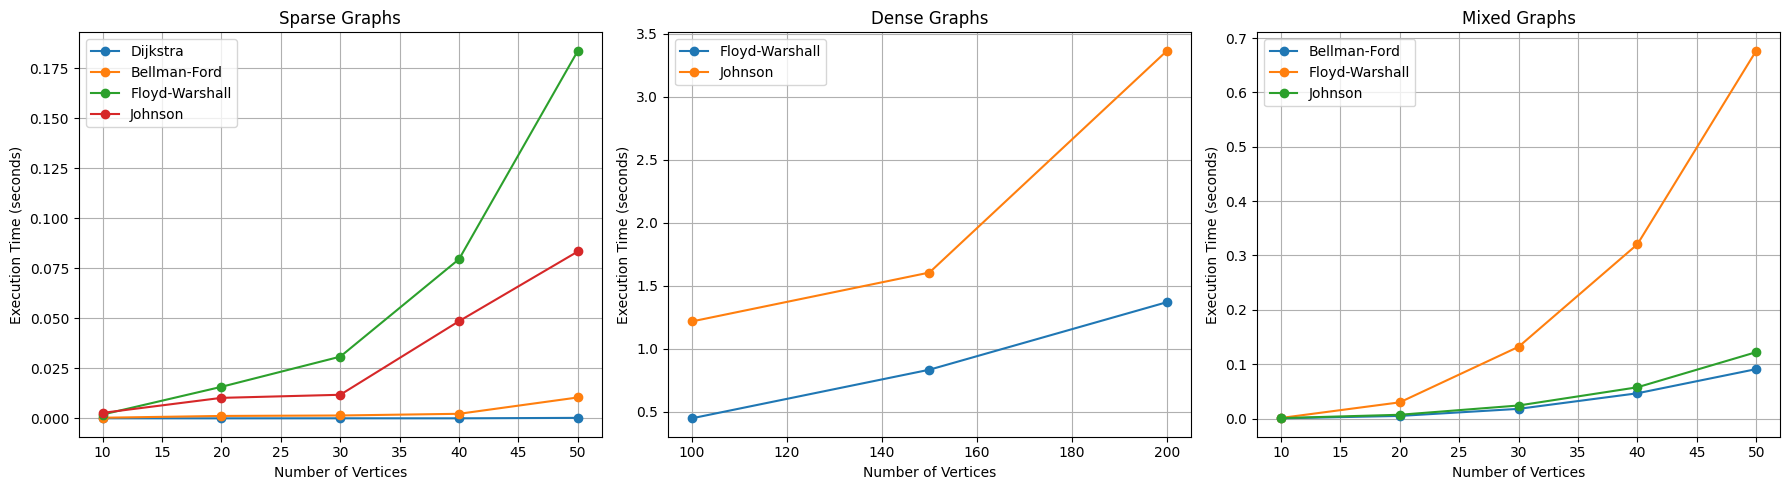

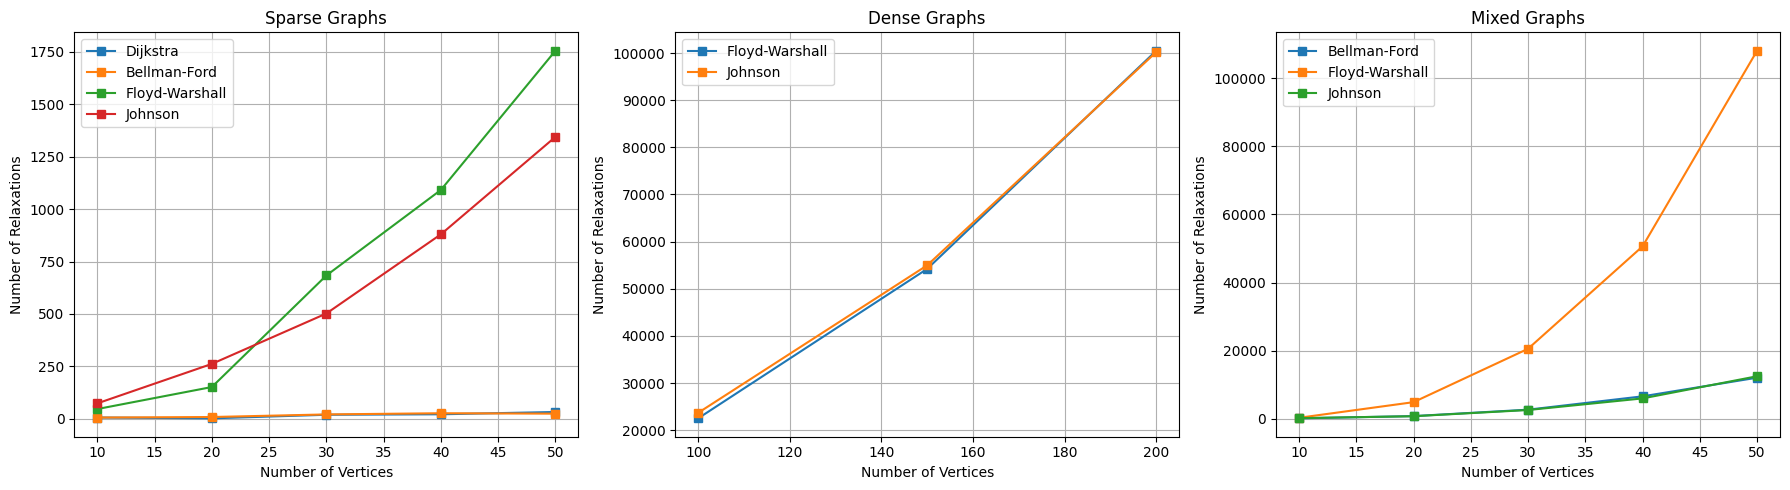

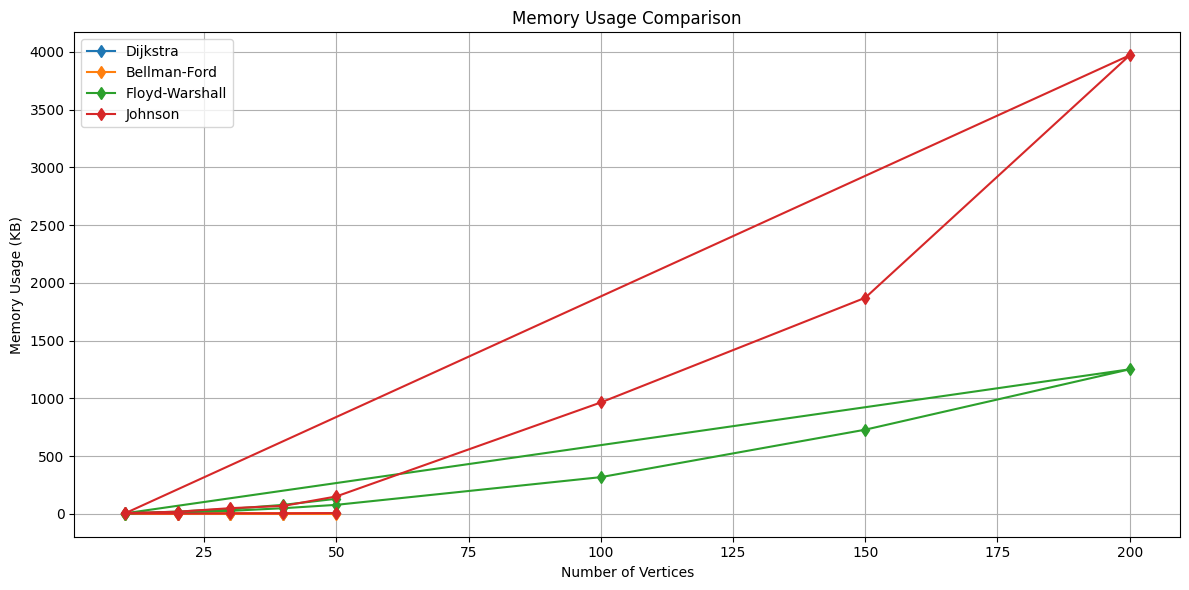

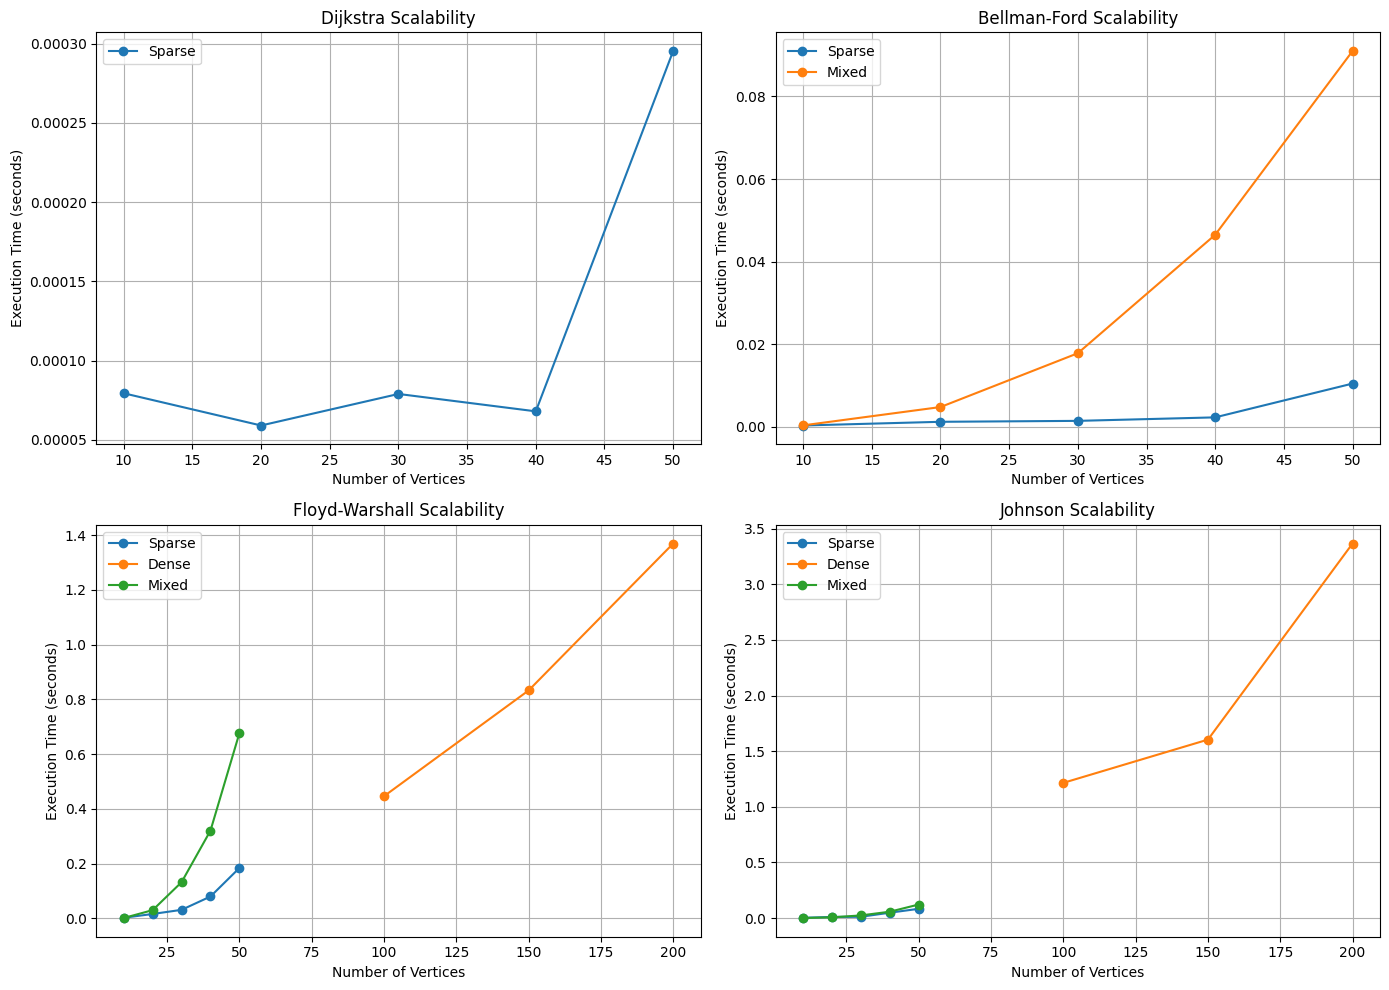



Verifying correctness with sample graph...

CORRECTNESS VERIFICATION

1. Running Dijkstra from vertex 1...
   Distances: {1: 0, 2: 2, 3: 3, 4: 7, 5: 6}

2. Running Bellman-Ford from vertex 1...
   Distances: [0, 2, 3, 7, 6]

3. Running Floyd-Warshall...
   Distances from vertex 1: [0, 2, 3, 7, 6]

4. Running Johnson's...
   Distances from vertex 1: {1: 0, 2: 2, 3: 3, 4: 7, 5: 6}

--------------------------------------------------------------------------------
COMPARISON:
--------------------------------------------------------------------------------
Vertex 1: Dijkstra=0.00, Bellman-Ford=0.00, Floyd-Warshall=0.00, Johnson=0.00 [✓ MATCH]
Vertex 2: Dijkstra=2.00, Bellman-Ford=2.00, Floyd-Warshall=2.00, Johnson=2.00 [✓ MATCH]
Vertex 3: Dijkstra=3.00, Bellman-Ford=3.00, Floyd-Warshall=3.00, Johnson=3.00 [✓ MATCH]
Vertex 4: Dijkstra=7.00, Bellman-Ford=7.00, Floyd-Warshall=7.00, Johnson=7.00 [✓ MATCH]
Vertex 5: Dijkstra=6.00, Bellman-Ford=6.00, Floyd-Warshall=6.00, Johnson=6.00 [✓ MATCH]
-

In [27]:
# Run complete experimental analysis
print("="*80)
print("STARTING COMPREHENSIVE EXPERIMENTAL ANALYSIS")
print("="*80)

# 1. Run all experiments
results_df = run_all_experiments()

# 2. Display and save results
print("\n\nEXPERIMENT RESULTS:")
create_comparison_table(results_df)
save_results_to_csv(results_df)

# 3. Generate visualizations
print("\n\nGenerating visualizations...")
plot_execution_time_comparison(results_df)
plot_relaxations_comparison(results_df)
plot_memory_usage(results_df)
plot_scalability(results_df)

# 4. Correctness verification
print("\n\nVerifying correctness with sample graph...")
sample_graph, sample_v, sample_e = generate_sparse_graph(5)
verify_correctness(sample_graph, sample_v)

# 5. Test negative weights
test_negative_weights()

# 6. Test negative cycle detection
test_negative_cycle_detection()

# 7. Generate final analysis report
generate_analysis_report(results_df)

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)